# Convert plate reader into our measure

* We use '01. AUTOMATA LAB/EXPERIMENTS/2023-06-06_16:11:54 PROVA/PLATE1/Picture_Res___2023-06-06_16:14:42_P1_Cam1.jpg'

In [51]:
import cv2 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imageproc import get_pocillos, complete_the_grid, draw_circles, array_from_pic, circle_crop

## Fluorescència

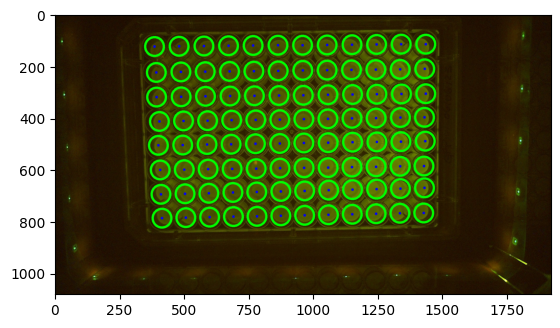

In [52]:
# Import image and detect circles
cam1 = '/Users/guillemcobos/Library/CloudStorage/GoogleDrive-guillem.cobos@koabiotech.com/.shortcut-targets-by-id/1UQ_YnLRmoAqhCue-qXYNP9QhYorsiAxS/KOA Biotech/01. AUTOMATA LAB/EXPERIMENTS/2023-06-06_16:11:54 PROVA/PLATE1/Picture_Res___2023-06-06_16:14:42_P1_Cam1.jpg'
img = cv2.imread(cam1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_bw = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
circles = get_pocillos(img_bw)
new_circles = complete_the_grid(circles)
draw_circles(img, new_circles)

# Get our measure
q_output_array = np.zeros((8,12))
grid_positions = new_circles[:,3:5]

for i, position in enumerate(grid_positions):
    cropped_pocillo = circle_crop(img, new_circles[i,0:3])
    cropped_pocillo = cropped_pocillo[:,:,1]
    q_output_array[position[0], position[1]] = np.percentile(cropped_pocillo[cropped_pocillo != 0], 90)  

# Get readings
readings = pd.read_excel('/Users/guillemcobos/Library/CloudStorage/GoogleDrive-guillem.cobos@koabiotech.com/.shortcut-targets-by-id/1UQ_YnLRmoAqhCue-qXYNP9QhYorsiAxS/KOA Biotech/01. AUTOMATA LAB/EXPERIMENTS/2023-06-06_16:11:54 PROVA/PLATE1/GFP CT.xlsx').iloc[23:31,2:14].values.astype(int)


In [53]:
coefficients = np.polyfit(readings.flatten(), q_output_array.flatten(),1)
m = coefficients[0]  # Slope of the line
b = coefficients[1]  # Intercept of the line

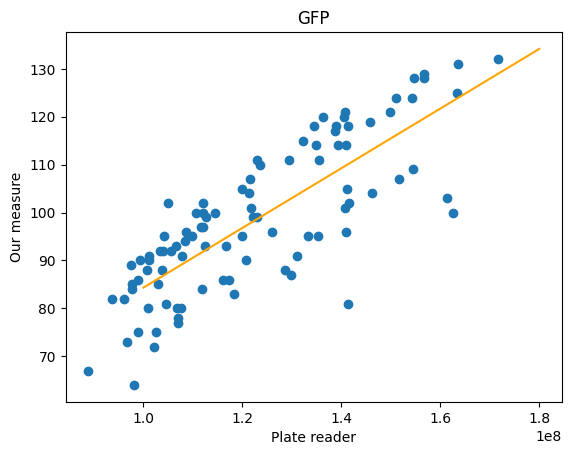

In [55]:
plt.scatter(readings.flatten(), q_output_array.flatten())
x = np.arange(100000000, 180000000, 10000)
plt.plot(x, m*x+b, color='orange')
plt.xlabel('Plate reader')
plt.ylabel('Our measure')
plt.title('GFP')
plt.show()

## Absorbància

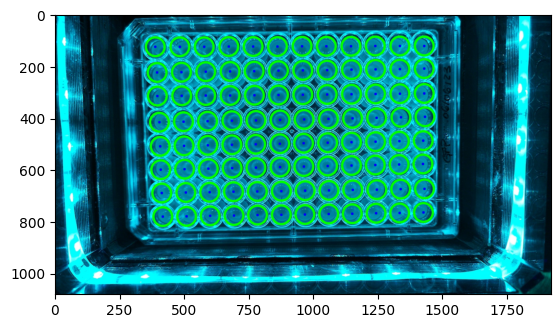

In [56]:
# Import image and detect circles
cam2 = '/Users/guillemcobos/Library/CloudStorage/GoogleDrive-guillem.cobos@koabiotech.com/.shortcut-targets-by-id/1UQ_YnLRmoAqhCue-qXYNP9QhYorsiAxS/KOA Biotech/01. AUTOMATA LAB/EXPERIMENTS/2023-06-06_16:11:54 PROVA/PLATE1/Picture_Res___2023-06-06_16:14:42_P1_Cam2.jpg'
img = cv2.imread(cam2)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_bw = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
circles = get_pocillos(img_bw)
new_circles = complete_the_grid(circles)
draw_circles(img, new_circles)

# Get our measure
mean_output_array = np.zeros((8,12))
grid_positions = new_circles[:,3:5]

for i, position in enumerate(grid_positions):
    cropped_pocillo = circle_crop(img, new_circles[i,0:3])
    cropped_pocillo = cropped_pocillo[:,:,2]
    mean_output_array[position[0], position[1]] = np.mean(cropped_pocillo[cropped_pocillo != 0])  

# Get readings
readings = pd.read_excel('/Users/guillemcobos/Library/CloudStorage/GoogleDrive-guillem.cobos@koabiotech.com/.shortcut-targets-by-id/1UQ_YnLRmoAqhCue-qXYNP9QhYorsiAxS/KOA Biotech/01. AUTOMATA LAB/EXPERIMENTS/2023-06-06_16:11:54 PROVA/PLATE1/GFP CT.xlsx').iloc[2:10,2:14].values.astype(float)


In [57]:
coefficients = np.polyfit(readings.flatten(), mean_output_array.flatten(),1)
m = coefficients[0]  # Slope of the line
b = coefficients[1]  # Intercept of the line

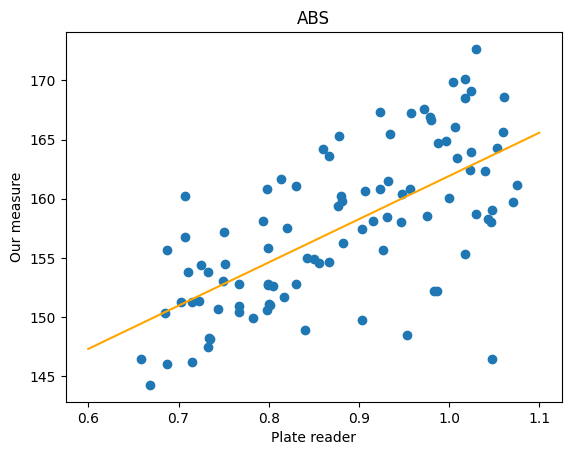

In [58]:
plt.scatter(readings.flatten(), mean_output_array.flatten())
x = np.arange(0.6, 1.2, .1)
plt.plot(x, m*x+b, color='orange')
plt.xlabel('Plate reader')
plt.ylabel('Our measure')
plt.title('ABS')
plt.show()